In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)


In [4]:
# df = pd.read_csv("E:/2cents_/merged_finnifty.csv", low_memory=False)


In [5]:
df = pd.read_csv("E:/2cents_/merged_finnifty.csv")

C:\Users\risha\AppData\Local\Temp\ipykernel_11104\3091726382.py:1: DtypeWarning: Columns (4,5,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("E:/2cents_/merged_finnifty.csv")


In [6]:
df = df.dropna(subset=['ticker'])
df['iv'] = df['iv'].fillna(-10)


In [7]:
df['iv'].isna().sum()

0

In [8]:
# import os
# import pandas as pd
# from tqdm import tqdm  # Import tqdm for progress bar

# folder_path = "D:/WorldQuant/Finnifty/Finnifty"

# # Initialize an empty list to hold DataFrames
# dfs = []

# # Get a list of all CSV files in the folder
# csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# # Use tqdm to create a progress bar while reading files
# for file_name in tqdm(csv_files, desc="Reading CSV files"):
#     file_path = os.path.join(folder_path, file_name)
#     # print(f"Reading {file_name}...")

#     # Read the CSV file into a DataFrame
#     df = pd.read_csv(file_path)
    
#     # Append the DataFrame to the list
#     dfs.append(df)

# # Merge all DataFrames into one
# merged_df = pd.concat(dfs, ignore_index=True)

# # Save the merged DataFrame to a CSV file
# output_path = "merged_finnifty.csv"
# merged_df.to_csv(output_path, index=False)

# print(f"Merged CSV saved to {output_path}")

In [9]:
df.shape

(12099668, 23)

In [10]:
df.columns

Index(['ticker', 'datetime', 'date', 'time', 'open', 'high', 'low', 'close',
       'volume', 'open_interest', 'strike_price', 'instrument_type',
       'expiry_date', 'instrument_name', 'expiry_type', 'Time_to_expiry',
       'spot_price', 'iv', 'delta', 'gamma', 'vega', 'theta', 'rho'],
      dtype='object')

In [11]:
df_iv = df[df['iv'] > 0.8]


In [12]:
df_thres_iv = df_iv[df_iv['iv'] != -10]

In [13]:
# Convert 'date' column to datetime format
df_thres_iv['date'] = pd.to_datetime(df_thres_iv['date'])

# Calculate 'expiry_date' by adding 'days_to_expiry' to 'date'
df_thres_iv['expiry_date'] = df_thres_iv['date'] + pd.to_timedelta(df_thres_iv['Time_to_expiry'], unit='D')

In [14]:
calls = df_thres_iv[df_thres_iv['ticker'].str.contains('CE')]
puts = df_thres_iv[df_thres_iv['ticker'].str.contains('PE')]

In [15]:
from tqdm import tqdm

In [16]:
df_thres_iv

,ticker,datetime,date,time,open,high,low,close,volume,open_interest,strike_price,instrument_type,expiry_date,instrument_name,expiry_type,Time_to_expiry,spot_price,iv,delta,gamma,vega,theta,rho
5,FINNIFTY01APR2113500PE,2021-03-30 12:58:59,2021-03-30,12:58:59,1.9,1.9,1.90,1.9,40,0,13500.0,PE,2021-04-01,FINNIFTY,NaN,2.0,15941.60,0.896770,-0.005581,1.506836e-05,0.188169,-4.218482,-0.004981
6,FINNIFTY01APR2113500PE,2021-03-30 12:59:59,2021-03-30,12:59:59,1.9,1.9,1.90,1.9,240,0,13500.0,PE,2021-04-01,FINNIFTY,NaN,2.0,15935.95,0.895096,-0.005593,1.512981e-05,0.188450,-4.216894,-0.004989
7,FINNIFTY01APR2113500PE,2021-03-30 13:00:59,2021-03-30,13:00:59,1.9,1.9,1.90,1.9,80,0,13500.0,PE,2021-04-01,FINNIFTY,NaN,2.0,15909.80,0.887334,-0.005647,1.541921e-05,0.189765,-4.209500,-0.005029
8,FINNIFTY01APR2113500PE,2021-03-30 13:01:59,2021-03-30,13:01:59,1.9,1.9,1.90,1.9,15640,360,13500.0,PE,2021-04-01,FINNIFTY,NaN,2.0,15901.50,0.884867,-0.005665,1.551282e-05,0.190187,-4.207137,-0.005041
9,FINNIFTY01APR2113500PE,2021-03-30 13:04:59,2021-03-30,13:04:59,1.9,2.05,1.90,1.95,31480,16000,13500.0,PE,2021-04-01,FINNIFTY,NaN,2.0,15912.30,0.890717,-0.005761,1.563218e-05,0.193180,-4.301591,-0.005131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12099664,FINNIFTY31OCT2323500CE,2023-10-31 15:11:59,2023-10-31,15:11:59,0.05,0.05,0.05,0.05,9240,240480,23500.0,CE,2023-10-31,FINNIFTY,NaN,0.0,19223.10,1.070588,0.000188,6.628665e-07,0.007185,-0.384592,0.000097
12099665,FINNIFTY31OCT2323500CE,2023-10-31 15:17:59,2023-10-31,15:17:59,0.05,0.05,0.05,0.05,40,234280,23500.0,CE,2023-10-31,FINNIFTY,NaN,0.0,19211.55,1.073608,0.000187,6.601435e-07,0.007167,-0.384713,0.000097
12099666,FINNIFTY31OCT2323500CE,2023-10-31 15:19:59,2023-10-31,15:19:59,0.05,0.05,0.05,0.05,40,234320,23500.0,CE,2023-10-31,FINNIFTY,NaN,0.0,19215.60,1.072549,0.000187,6.610960e-07,0.007173,-0.384671,0.000097
12099667,FINNIFTY31OCT2323500CE,2023-10-31 15:20:59,2023-10-31,15:20:59,0.05,0.05,0.05,0.05,80,234320,23500.0,CE,2023-10-31,FINNIFTY,NaN,0.0,19208.65,1.074366,0.000187,6.594629e-07,0.007162,-0.384743,0.000097


In [17]:
# Set margin value
margin = 0.05

# Filter calls based on call strike == call spot within a 5% margin
filtered_calls = calls[
    (calls['strike_price'] >= calls['spot_price'] * (1 - margin)) &
    (calls['strike_price'] <= calls['spot_price'] * (1 + margin))
]

# Filter puts based on put strike == put spot within a 5% margin
filtered_puts = puts[
    (puts['strike_price'] >= puts['spot_price'] * (1 - margin)) &
    (puts['strike_price'] <= puts['spot_price'] * (1 + margin))
]

# Initialize an empty list to store matched straddles
matched_straddles = []

# Loop through each filtered call option with a progress bar
for _, call in tqdm(filtered_calls.iterrows(), total=filtered_calls.shape[0], desc="Matching Straddles"):
    # Find matching puts with the same strike price and expiry date
    matching_puts = filtered_puts[
        (filtered_puts['strike_price'] == call['strike_price']) &
        (filtered_puts['expiry_date'] == call['expiry_date'])
    ]
   
    # Append matched pairs to the list
    for _, put in matching_puts.iterrows():
        matched_straddles.append({
            'call_ticker': call['ticker'],
            'call_strike_price': call['strike_price'],
            'call_spot_price': call['spot_price'],
            'call_expiry_date': call['expiry_date'],
            'put_ticker': put['ticker'],
            'put_strike_price': put['strike_price'],
            'put_spot_price': put['spot_price'],
            'put_expiry_date': put['expiry_date'],
            'date_of_trade' : call['date']
        })

# Convert the list to a DataFrame
matched_straddles_df = pd.DataFrame(matched_straddles)

# Display or use the matched straddles DataFrame
print(matched_straddles_df)

Matching Straddles: 100%|██████████| 220/220 [00:00<00:00, 2377.67it/s]

             call_ticker  call_strike_price  call_spot_price call_expiry_date  \
0   FINNIFTY2220117600CE            17600.0         18157.55       2022-02-01   
1   FINNIFTY2220117600CE            17600.0         18006.00       2022-02-01   
2   FINNIFTY2220117600CE            17600.0         18170.70       2022-02-01   
3   FINNIFTY2221516800CE            16800.0         17028.80       2022-02-15   
4   FINNIFTY2221516800CE            16800.0         17533.45       2022-02-15   
5   FINNIFTY2221516800CE            16800.0         17537.35       2022-02-15   
6   FINNIFTY2230815800CE            15800.0         15403.95       2022-03-08   
7   FINNIFTY2230815800CE            15800.0         15403.95       2022-03-08   
8   FINNIFTY2230815800CE            15800.0         15399.85       2022-03-08   
9   FINNIFTY2230815800CE            15800.0         15399.85       2022-03-08   
10  FINNIFTY2230815900CE            15900.0         15325.70       2022-03-08   
11  FINNIFTY2230815900CE    

In [18]:
matched_straddles_df

,call_ticker,call_strike_price,call_spot_price,call_expiry_date,put_ticker,put_strike_price,put_spot_price,put_expiry_date,date_of_trade
0,FINNIFTY2220117600CE,17600.0,18157.55,2022-02-01,FINNIFTY2220117600PE,17600.0,18026.20,2022-02-01,2022-02-01
1,FINNIFTY2220117600CE,17600.0,18006.00,2022-02-01,FINNIFTY2220117600PE,17600.0,18026.20,2022-02-01,2022-02-01
2,FINNIFTY2220117600CE,17600.0,18170.70,2022-02-01,FINNIFTY2220117600PE,17600.0,18026.20,2022-02-01,2022-02-01
3,FINNIFTY2221516800CE,16800.0,17028.80,2022-02-15,FINNIFTY2221516800PE,16800.0,17102.85,2022-02-15,2022-02-15
4,FINNIFTY2221516800CE,16800.0,17533.45,2022-02-15,FINNIFTY2221516800PE,16800.0,17102.85,2022-02-15,2022-02-15
5,FINNIFTY2221516800CE,16800.0,17537.35,2022-02-15,FINNIFTY2221516800PE,16800.0,17102.85,2022-02-15,2022-02-15
6,FINNIFTY2230815800CE,15800.0,15403.95,2022-03-08,FINNIFTY2230815800PE,15800.0,15113.45,2022-03-08,2022-03-07
7,FINNIFTY2230815800CE,15800.0,15403.95,2022-03-08,FINNIFTY2230815800PE,15800.0,15113.45,2022-03-08,2022-03-07
8,FINNIFTY2230815800CE,15800.0,15399.85,2022-03-08,FINNIFTY2230815800PE,15800.0,15113.45,2022-03-08,2022-03-07
9,FINNIFTY2230815800CE,15800.0,15399.85,2022-03-08,FINNIFTY2230815800PE,15800.0,15113.45,2022-03-08,2022-03-07


## using finnifty spot prices dataset given

In [19]:
fin_nifty_index = pd.read_csv(r"E:\2cents_\Dataset_Provided\NewFolder\Indexspotprices\zip\idx_1m\NIFTY FIN SERVICE_NSE_minute.csv")

In [20]:
fin_nifty_index.head()

,date,open,high,low,close,volume
0,2015-01-09 09:15:00+05:30,7473.50,7473.65,7466.35,7466.35,0
1,2015-01-09 09:16:00+05:30,7467.60,7468.70,7460.70,7463.20,0
2,2015-01-09 09:17:00+05:30,7463.20,7476.70,7463.20,7476.70,0
3,2015-01-09 09:18:00+05:30,7476.70,7485.55,7476.70,7485.45,0
4,2015-01-09 09:19:00+05:30,7485.45,7488.70,7483.75,7484.95,0


In [21]:
fin_nifty_index['date_only'] = fin_nifty_index['date'].astype(str).str[:10]


In [22]:
fin_nifty_index['time'] = fin_nifty_index['date'].str[11:19]


In [23]:
fin_nifty_index['date_only'] = pd.to_datetime(fin_nifty_index['date_only'], format='%Y-%m-%d')


In [24]:
fin_nifty_index['time'] = pd.to_datetime(fin_nifty_index['time'], format='%H:%M:%S').dt.time


In [25]:
fin_nifty_index['date_only'].nunique()

2352

In [26]:
# Group by 'date_only' and get the max time for each date
max_times = fin_nifty_index.groupby('date_only')['time'].max().reset_index()

# Merge max_times back to the original DataFrame to retain all other columns
fin_nifty_close = fin_nifty_index.merge(max_times, on=['date_only', 'time'], how='right')

In [27]:
fin_nifty_close

,date,open,high,low,close,volume,date_only,time
0,2015-01-09 15:29:00+05:30,7375.15,7380.80,7374.40,7380.80,0,2015-01-09,15:29:00
1,2015-01-12 15:29:00+05:30,7445.60,7447.50,7441.85,7443.00,0,2015-01-12,15:29:00
2,2015-01-13 15:29:00+05:30,7412.30,7412.55,7405.70,7405.70,0,2015-01-13,15:29:00
3,2015-01-14 15:29:00+05:30,7372.25,7373.95,7371.55,7373.95,0,2015-01-14,15:29:00
4,2015-01-15 15:29:00+05:30,7662.25,7662.25,7652.70,7652.70,0,2015-01-15,15:29:00
...,...,...,...,...,...,...,...,...
2347,2024-07-05 15:29:00+05:30,23635.60,23638.75,23625.95,23628.55,0,2024-07-05,15:29:00
2348,2024-07-08 15:29:00+05:30,23607.10,23613.40,23596.15,23604.80,0,2024-07-08,15:29:00
2349,2024-07-09 15:29:00+05:30,23652.30,23653.75,23628.95,23641.60,0,2024-07-09,15:29:00
2350,2024-07-10 15:29:00+05:30,23606.85,23613.60,23603.15,23606.80,0,2024-07-10,15:29:00


In [28]:
# Perform a left merge
merged_df = matched_straddles_df.merge(
    fin_nifty_close,
    left_on='put_expiry_date',
    right_on='date_only',
    how='left'  # This specifies a left merge
)

In [29]:
merged_df = merged_df.sort_values(by='date_of_trade', ascending=True).reset_index(drop=True)


In [30]:
# Calculate the payoff for the call option
merged_df['call_payoff'] = merged_df['close'] - merged_df['call_strike_price']
merged_df['call_payoff'] = merged_df['call_payoff'].clip(lower=0)  # Payoff can't be negative

# Calculate the payoff for the put option
merged_df['put_payoff'] = merged_df['put_strike_price'] - merged_df['close']
merged_df['put_payoff'] = merged_df['put_payoff'].clip(lower=0)  # Payoff can't be negative

In [31]:
merged_df['final_payoff'] = merged_df['call_payoff'] + merged_df['put_payoff']

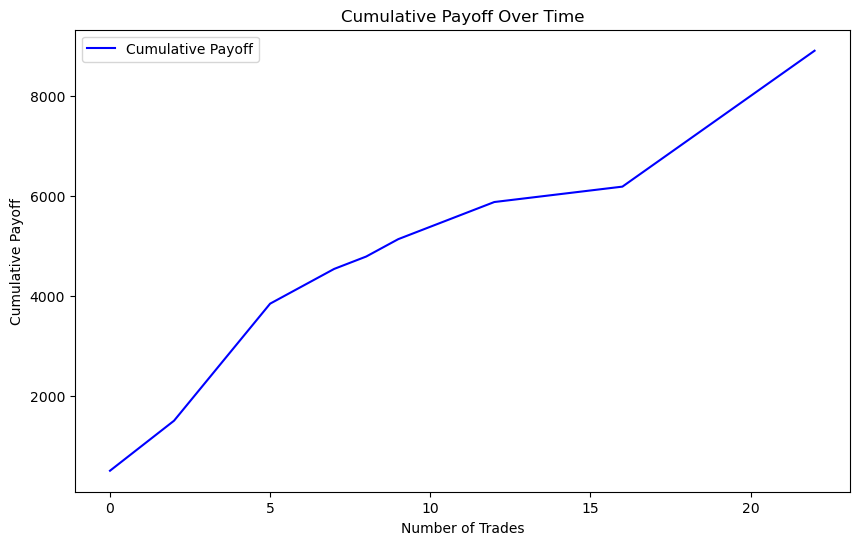

In [32]:
# Compute cumulative sum of final payoff and store in a list
cumulative_payoff = merged_df['final_payoff'].cumsum().tolist()

# Plot the cumulative payoff
plt.figure(figsize=(10, 6))
plt.plot(cumulative_payoff, label='Cumulative Payoff', color='blue')
plt.xlabel('Number of Trades')
plt.ylabel('Cumulative Payoff')
plt.title('Cumulative Payoff Over Time')
plt.legend()
plt.show()

### Straddle itself is a delta neutral strategy

In [33]:
filtered_calls_renamed = filtered_calls.rename(columns={'date': 'date_of_trade', 'ticker': 'call_ticker', 'open' : 'open_call'})

# Merge DataFrames
merged_result = pd.merge(merged_df, 
                          filtered_calls_renamed[['call_ticker', 'date_of_trade', 'open_call']], 
                          on=['call_ticker', 'date_of_trade'], 
                          how='left')

In [34]:
filtered_puts_renamed = filtered_puts.rename(columns={'date': 'date_of_trade', 'ticker': 'put_ticker', 'open' : 'open_put'})

# Merge DataFrames
merged_result = pd.merge(merged_result, 
                          filtered_puts_renamed[['put_ticker', 'date_of_trade', 'open_put']], 
                          on=['put_ticker', 'date_of_trade'], 
                          how='left')

In [35]:
merged_df.shape

(23, 20)

In [36]:
merged_result.shape

(68, 22)

In [37]:
merged_result = merged_result.drop_duplicates()


In [38]:
merged_result.head(2)

,call_ticker,call_strike_price,call_spot_price,call_expiry_date,put_ticker,put_strike_price,put_spot_price,put_expiry_date,date_of_trade,date,open,high,low,close,volume,date_only,time,call_payoff,put_payoff,final_payoff,open_call,open_put
0,FINNIFTY2220117600CE,17600.0,18157.55,2022-02-01,FINNIFTY2220117600PE,17600.0,18026.2,2022-02-01,2022-02-01,2022-02-01 15:29:00+05:30,18095.5,18103.6,18091.6,18100.65,0,2022-02-01,15:29:00,500.65,0.0,500.65,709.95,148.95
2,FINNIFTY2220117600CE,17600.0,18157.55,2022-02-01,FINNIFTY2220117600PE,17600.0,18026.2,2022-02-01,2022-02-01,2022-02-01 15:29:00+05:30,18095.5,18103.6,18091.6,18100.65,0,2022-02-01,15:29:00,500.65,0.0,500.65,698.75,148.95


In [39]:
merged_result['return'] = (merged_result['final_payoff'] - (merged_result['open_call'] + merged_result['open_put']))/ (merged_result['open_call'] + merged_result['open_put'])

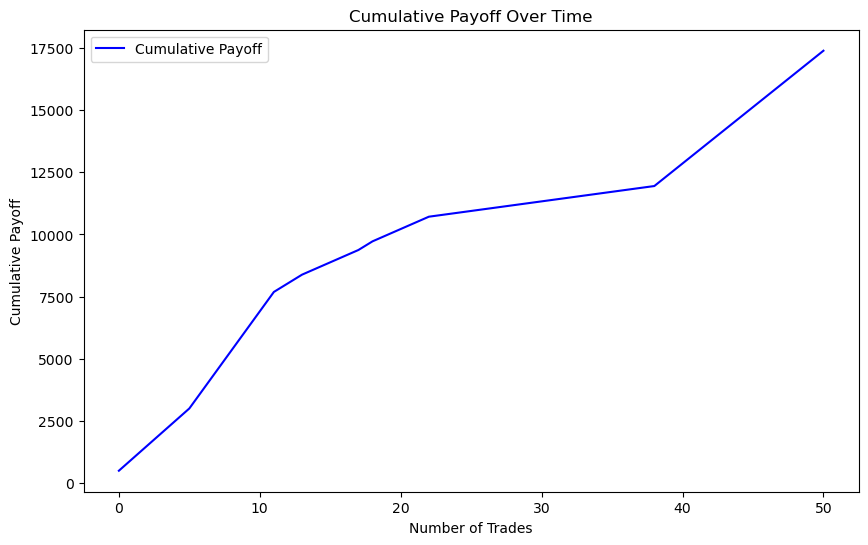

In [40]:
# merged_result# Compute cumulative sum of final payoff and store in a list
cumulative_payoff = merged_result['final_payoff'].cumsum().tolist()

# Plot the cumulative payoff
plt.figure(figsize=(10, 6))
plt.plot(cumulative_payoff, label='Cumulative Payoff', color='blue')
plt.xlabel('Number of Trades')
plt.ylabel('Cumulative Payoff')
plt.title('Cumulative Payoff Over Time')
plt.legend()
plt.show()